## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.shape)
print(study_results.shape)

# Combine the data into a single dataset
study_data=pd.merge(study_results,mouse_metadata,how="inner",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
print(study_data.shape)
study_data.head(20)


(249, 5)
(1893, 4)
(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
study_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=study_data[study_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data[study_data["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean=study_data[(study_data["Mouse ID"]!="g989")]
study_data_clean.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
study_data_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugreg_tvol_avg=study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drugreg_tvol_avg

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
drugreg_tvol_median=study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drugreg_tvol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
drugreg_tvol_var=study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drugreg_tvol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
drugreg_tvol_std=study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drugreg_tvol_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
drugreg_tvol_sem=study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drugreg_tvol_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugreg_stats=pd.DataFrame({"Mean Tumor Vol":drugreg_tvol_avg,
                            "Median Tumor Vol":drugreg_tvol_median,
                            "Tumor Vol Var":drugreg_tvol_var,
                            "Tumor Vol St.D":drugreg_tvol_std,
                            "Tumor Vol Std.Err":drugreg_tvol_sem})
drugreg_stats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Var,Tumor Vol St.D,Tumor Vol Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
drugreg_stats_agg=study_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drugreg_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements by Regimen'}, xlabel='Drug Regimen'>

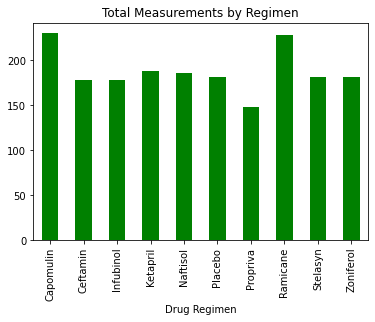

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
study_data_clean.groupby("Drug Regimen")["Timepoint"].count().plot(kind='bar', 
                                                                   x='Drug Regimen', 
                                                                   y='Total Measurements',
                                                                   color='green',
                                                                   title='Total Measurements by Regimen')

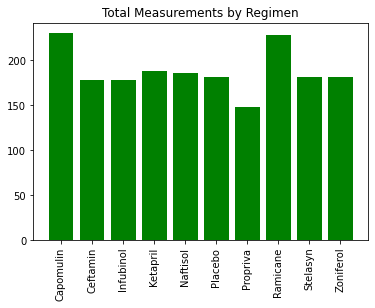

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugreg_time_count = study_data_clean.groupby("Drug Regimen")["Timepoint"].count()
x_axis = range(len(drugreg_time_count))
plt.bar(x_axis, drugreg_time_count, color='g', align='center')
plt.title('Total Measurements by Regimen')
tick_locations=[value for value in x_axis]
tick_labels=list(drugreg_time_count.index.values)
plt.xticks(tick_locations, tick_labels,rotation=90)
plt.show()


<AxesSubplot:title={'center':'Mouse Sex Distribution'}, ylabel='Mouse ID'>

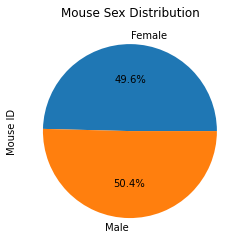

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_data_clean.groupby("Sex")["Mouse ID"].nunique().plot(kind='pie',
                                                           autopct='%1.1f%%',
                                                           title='Mouse Sex Distribution')

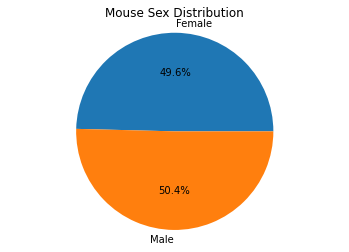

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse_count=study_data_clean.groupby("Sex")["Mouse ID"].nunique()
tick_labels=list(sex_mouse_count.index.values)
plt.pie(sex_mouse_count,labels=tick_labels,autopct='%1.1f%%')
plt.title("Mouse Sex Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_mouse=study_data_clean.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_mouse

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tvol_final=pd.merge(max_timepoint_mouse,study_data_clean, how='inner', on=["Mouse ID","Timepoint"])
tvol_final.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [20]:
tvol_final_filt=tvol_final[(tvol_final["Drug Regimen"]=="Capomulin")]
tvol_final_filt["Tumor Volume (mm3)"]

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
candidates=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

final_tvol_cap=tvol_final["Tumor Volume (mm3)"][tvol_final["Drug Regimen"]=="Capomulin"]
final_tvol_ram=tvol_final["Tumor Volume (mm3)"][tvol_final["Drug Regimen"]=="Ramicane"]
final_tvol_inf=tvol_final["Tumor Volume (mm3)"][tvol_final["Drug Regimen"]=="Infubinol"]
final_tvol_ceft=tvol_final["Tumor Volume (mm3)"][tvol_final["Drug Regimen"]=="Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = final_tvol_cap.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of volumes is: {lowerq_cap}")
print(f"The upper quartile of volumes is: {upperq_cap}")
print(f"The interquartile range of volumes is: {iqr_cap}")
print(f"The the median of volumes is: {quartiles_cap[0.5]} ")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of volumes is: 32.37735684
The upper quartile of volumes is: 40.1592203
The interquartile range of volumes is: 7.781863460000004
The the median of volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_ram = final_tvol_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of volumes is: {lowerq_ram}")
print(f"The upper quartile of volumes is: {upperq_ram}")
print(f"The interquartile range of volumes is: {iqr_ram}")
print(f"The the median of volumes is: {quartiles_ram[0.5]} ")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

The lower quartile of volumes is: 31.56046955
The upper quartile of volumes is: 40.65900627
The interquartile range of volumes is: 9.098536719999998
The the median of volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_inf = final_tvol_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of volumes is: {lowerq_inf}")
print(f"The upper quartile of volumes is: {upperq_inf}")
print(f"The interquartile range of volumes is: {iqr_inf}")
print(f"The the median of volumes is: {quartiles_inf[0.5]} ")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

The lower quartile of volumes is: 54.04860769
The upper quartile of volumes is: 65.52574285
The interquartile range of volumes is: 11.477135160000003
The the median of volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_ceft = final_tvol_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

print(f"The lower quartile of volumes is: {lowerq_ceft}")
print(f"The upper quartile of volumes is: {upperq_ceft}")
print(f"The interquartile range of volumes is: {iqr_ceft}")
print(f"The the median of volumes is: {quartiles_ceft[0.5]} ")

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")

The lower quartile of volumes is: 48.72207785
The upper quartile of volumes is: 64.29983003
The interquartile range of volumes is: 15.577752179999997
The the median of volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


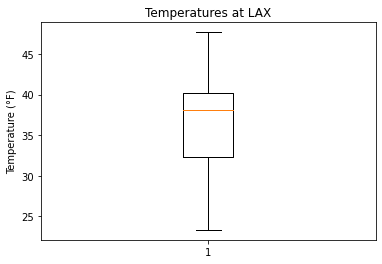

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(final_tvol_cap)
plt.show()

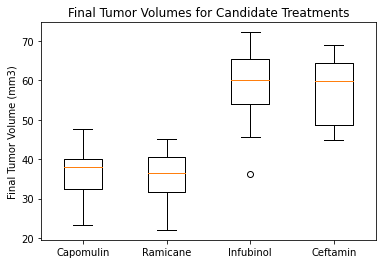

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tvol_data = [final_tvol_cap,final_tvol_ram,final_tvol_inf,final_tvol_ceft]
plt.title('Final Tumor Volumes for Candidate Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(final_tvol_data)
plt.xticks([1,2,3,4],candidates)
plt.show()

In [27]:
## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
